# Introduction to Data Science - Project #2 - School Performance

# Notebook written by: Matt Ellis

## Problem Statement

The mayor of New York, a former data scientist, is particularly interested in the math scores in the New York school districts.  The mayor has asked you to analyze the test scores across the New York school districts.  The mayor is looking for insights or trends to improve the quality of the New York schools.  She has provided you with a set of scores from across the city.

## Data Sources ##

The New York math tests results are at the following location:

https://catalog.data.gov/dataset/2006-2012-math-test-results-district-all-students

The first few columns in the file are: District,Grade,Year,Demographic,Number Tested, and Mean Scale Score.

## Acquiring Data

### <span style="color:red">Task</span>

Download a local copy of the school data.

### <span style="color:red">Task</span>

Load the data into a dataframe called "schools" and display the contents of the resulting dataframe.

In [53]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [54]:
schools = pd.read_csv('2006_-_2012__Math_Test_Results_-_District_-_All_Students.csv')

In [55]:
type(schools)

pandas.core.frame.DataFrame

In [56]:
schools

,District,Grade,Year,Demographic,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
0,1,3,2006,All Students,936,673,73,7.8,170,18.2,484,51.7,209,22.3,693,74.0
1,1,3,2007,All Students,836,679,48,5.7,86,10.3,511,61.1,191,22.8,702,84.0
2,1,3,2008,All Students,862,686,17,2.0,94,10.9,537,62.3,214,24.8,751,87.1
3,1,3,2009,All Students,914,691,8,0.9,66,7.2,598,65.4,242,26.5,840,91.9
4,1,3,2010,All Students,866,697,89,10.3,257,29.7,279,32.2,241,27.8,520,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,32,All Grades,2008,All Students,9028,664,705,7.8,2025,22.4,5059,56.0,1239,13.7,6298,69.8
1564,32,All Grades,2009,All Students,8828,673,365,4.1,1526,17.3,5399,61.2,1538,17.4,6937,78.6
1565,32,All Grades,2010,All Students,8508,672,1187,14.0,3429,40.3,2671,31.4,1221,14.4,3892,45.7
1566,32,All Grades,2011,All Students,8221,671,1072,13.0,3340,40.6,2832,34.4,977,11.9,3809,46.3


## Exploring the Data

### <span style="color:red">Task</span>

Display the values and associated frequencies of the grade column. (Hint: see value_counts)

In [57]:
schools['Grade'].value_counts()

3             224
4             224
5             224
6             224
7             224
8             224
All Grades    224
Name: Grade, dtype: int64

### <span style="color:red">Task</span>

Display the values and associated frequencies of the district column, sorting the result by district number.

In [58]:
schools['District'].value_counts().sort_values()

1     49
3     49
4     49
5     49
6     49
7     49
8     49
9     49
10    49
11    49
12    49
13    49
14    49
15    49
16    49
18    49
19    49
20    49
21    49
22    49
23    49
24    49
25    49
26    49
27    49
28    49
29    49
30    49
31    49
2     49
17    49
32    49
Name: District, dtype: int64

### <span style="color:red">Task</span>

Display the values and associated frequencies of the year column, sorting the result by year.

In [59]:
schools['Year'].value_counts().sort_values()

2006    224
2007    224
2008    224
2009    224
2010    224
2011    224
2012    224
Name: Year, dtype: int64

## Preparing Data

### <span style="color:red">Task</span>

Display all the rows that do not have an explicit grade in the Grade column. (Hint: Look at the data and see what other value is in that column besides a specific grade and use that for selection)

In [60]:
schools[schools['Grade'] == 'All Grades']

,District,Grade,Year,Demographic,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
42,1,All Grades,2006,All Students,5389,659,710,13.2,1547,28.7,2250,41.8,882,16.4,3132,58.1
43,1,All Grades,2007,All Students,5208,666,512,9.8,1252,24.0,2449,47.0,995,19.1,3444,66.1
44,1,All Grades,2008,All Students,5186,674,279,5.4,984,19.0,2690,51.9,1233,23.8,3923,75.6
45,1,All Grades,2009,All Students,5183,682,187,3.6,723,13.9,2776,53.6,1497,28.9,4273,82.4
46,1,All Grades,2010,All Students,5167,684,527,10.2,1678,32.5,1545,29.9,1417,27.4,2962,57.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,32,All Grades,2008,All Students,9028,664,705,7.8,2025,22.4,5059,56.0,1239,13.7,6298,69.8
1564,32,All Grades,2009,All Students,8828,673,365,4.1,1526,17.3,5399,61.2,1538,17.4,6937,78.6
1565,32,All Grades,2010,All Students,8508,672,1187,14.0,3429,40.3,2671,31.4,1221,14.4,3892,45.7
1566,32,All Grades,2011,All Students,8221,671,1072,13.0,3340,40.6,2832,34.4,977,11.9,3809,46.3


### <span style="color:red">Task</span>

Remove all the rows from "schools" (in place) that have the do not have an explicit grade in the Grade column.
(Hint: One option is to use drop with index and inplace argument. Another is to create a new dataframe named schools by selecting the rows you want to keep)

In [61]:
schools.drop(schools.index[schools['Grade'] == 'All Grades'], inplace = True)

In [62]:
#schools = schools[schools.Grade != 'All Grades']

### <span style="color:red">Task</span>

Confirm that the 'All Grades' rows have been removed by doing the value counts on the Grade field again.


In [63]:
schools.Grade.value_counts()

3    224
4    224
5    224
6    224
7    224
8    224
Name: Grade, dtype: int64

## Exploring the Data

### <span style="color:red">Task</span>

How many students total were tested in each grade level? (Hint: See groupby, select column you need, and then apply the aggregation function. See the panda_dataframe_project_helper notebook)

In [64]:
schools.groupby(['Grade'])['Number Tested'].sum()

Grade
3    503289
4    498169
5    496265
6    492435
7    500868
8    510112
Name: Number Tested, dtype: int64

### <span style="color:red">Task</span>

How many students total were tested in each district?  Sort the result in descending order.  (Use the *sort_values* method after performing the sum).

In [65]:
schools.groupby(['District'])['Number Tested'].sum().sort_values(ascending=False)

District
31    183155
10    170882
24    166232
27    153814
20    133153
11    132366
30    127016
9     124449
22    114629
29    111224
28    101094
8      99603
21     99496
6      98821
25     96951
2      96494
19     90856
17     89427
15     83713
12     77981
26     76107
18     68586
32     61310
7      59899
14     58489
3      57725
23     50357
4      49939
13     48320
5      47220
1      36228
16     35602
Name: Number Tested, dtype: int64

### <span style="color:red">Task</span>

Use the *describe* method to show a set of descriptive statistics about the 'Mean Scale Score' across all districts for each grade. (Hint: Remember to groupby and select the column you want before you invoke describe)

In [66]:
schools.groupby(['Grade'])['Mean Scale Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Grade,,,,,,,,
3,224.0,683.776786,10.770088,655.0,677.75,683.0,690.00,718.0
4,224.0,680.178571,14.126726,650.0,669.00,680.0,690.25,723.0
5,224.0,676.441964,15.004819,638.0,667.00,677.0,687.00,716.0
6,224.0,668.321429,16.018607,626.0,659.00,667.0,680.00,711.0
7,224.0,663.852679,16.985636,621.0,654.75,663.0,676.25,704.0
8,224.0,661.062500,17.738146,615.0,649.75,662.0,673.25,701.0


### <span style="color:red">Task</span>

Show just the top mean scale score (across all years) for each grade.
(Hint: Similar to getting the sum, use a different aggregation/groupby method)

In [67]:
schools.groupby(['Grade'])['Mean Scale Score'].max()

Grade
3    718
4    723
5    716
6    711
7    704
8    701
Name: Mean Scale Score, dtype: int64

## Visualizing the Data

### <span style="color:red">Task</span>

Look up the DataFrame *hist* method that produces a histogram.  Use this method to produce a histogram for the 'Mean Scale Score' for each grade.
Hint: Use groupby and select the column you want

In [68]:
# Enlarge the graphics
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

array([[<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>],
       [<Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>],
       [<Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>]],
      dtype=object)

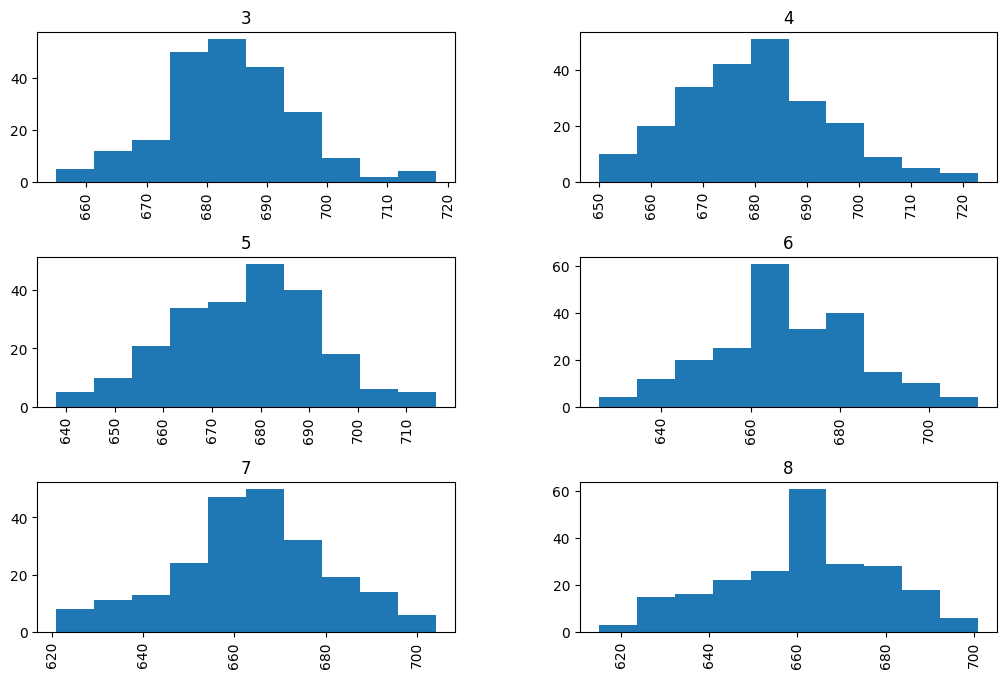

In [69]:
schools.hist(column='Mean Scale Score', by='Grade')

### <span style="color:red">Bonus Task</span>

Produce the histograms from above, but also print a title that includes the grade number on each histogram.

Hints: 
* https://stackoverflow.com/questions/25239933/how-to-add-title-to-subplots-in-matplotlib
* What is the being returned by the groupby of the histograms? (Series)
* The key to each row in the series is what we grouped by (Grade)
* Inside of each series there is a [[AxesSubplot]] (Axes object that makes the graph)
* You can access each axis and you matplot lib title method to set the title.

### <span style="color:red">Task</span>

Look up the DataFrame *plot* method.  Use this method to plot the 'Mean Scale Score' on the y-axis and 'District' on the x-axis for the entire dataframe. Use the 'o' style for the plot.

What insights do you draw from this plot?

<Axes: xlabel='District', ylabel='Mean Scale Score'>

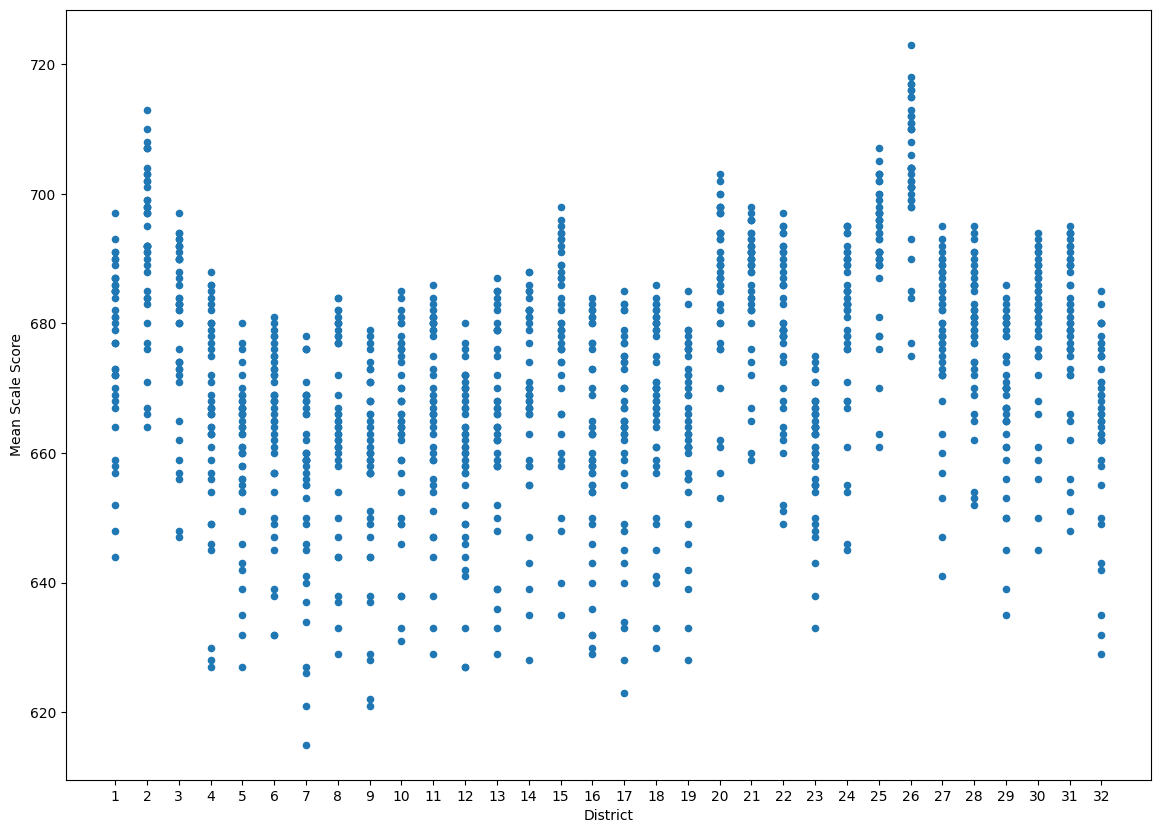

In [70]:
schools.plot(x='District', y='Mean Scale Score', kind="scatter", figsize=(14, 10), xticks=np.arange(1,33))

In [71]:
schools.groupby(['District'])['Mean Scale Score'].describe()

,count,mean,std,min,25%,50%,75%,max
District,,,,,,,,
1,42.0,677.023810,12.726941,644.0,670.50,680.5,686.00,697.0
2,42.0,692.642857,12.173184,664.0,685.75,693.5,701.75,713.0
3,42.0,679.619048,12.846092,647.0,673.25,683.0,690.00,697.0
4,42.0,666.095238,15.545071,627.0,659.50,667.0,678.75,688.0
5,42.0,659.904762,12.118942,627.0,655.25,663.0,667.00,680.0
6,42.0,663.690476,13.054273,632.0,657.00,667.5,673.00,681.0
7,42.0,656.023810,15.355126,615.0,649.25,659.0,667.75,678.0
8,42.0,664.357143,14.668402,629.0,659.25,664.5,677.75,684.0
9,42.0,658.047619,15.039707,621.0,650.25,660.0,668.00,679.0


### <span style="color:red">Task</span>

What insights do you draw from the plot above?

District 7 has the lowest scores, and District 26 the highest.

### <span style="color:red">Bonus Task</span>

Plot the 'Mean Scale Score' on the y-axis and 'District' on the x-axis for each grade in the entire dataframe. Use the 'o' style for the plot. (Hint: use the groupby and then invoke plot)

Grade
3    Axes(0.125,0.11;0.775x0.77)
4    Axes(0.125,0.11;0.775x0.77)
5    Axes(0.125,0.11;0.775x0.77)
6    Axes(0.125,0.11;0.775x0.77)
7    Axes(0.125,0.11;0.775x0.77)
8    Axes(0.125,0.11;0.775x0.77)
dtype: object

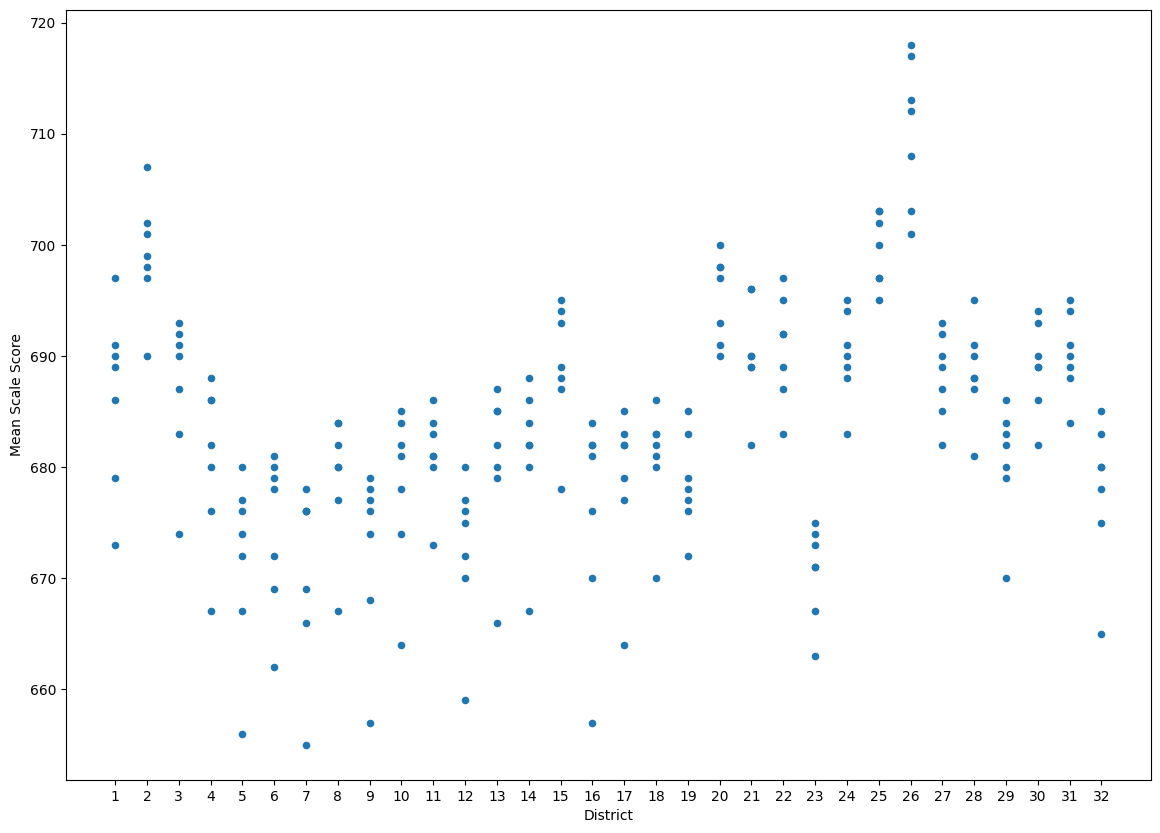

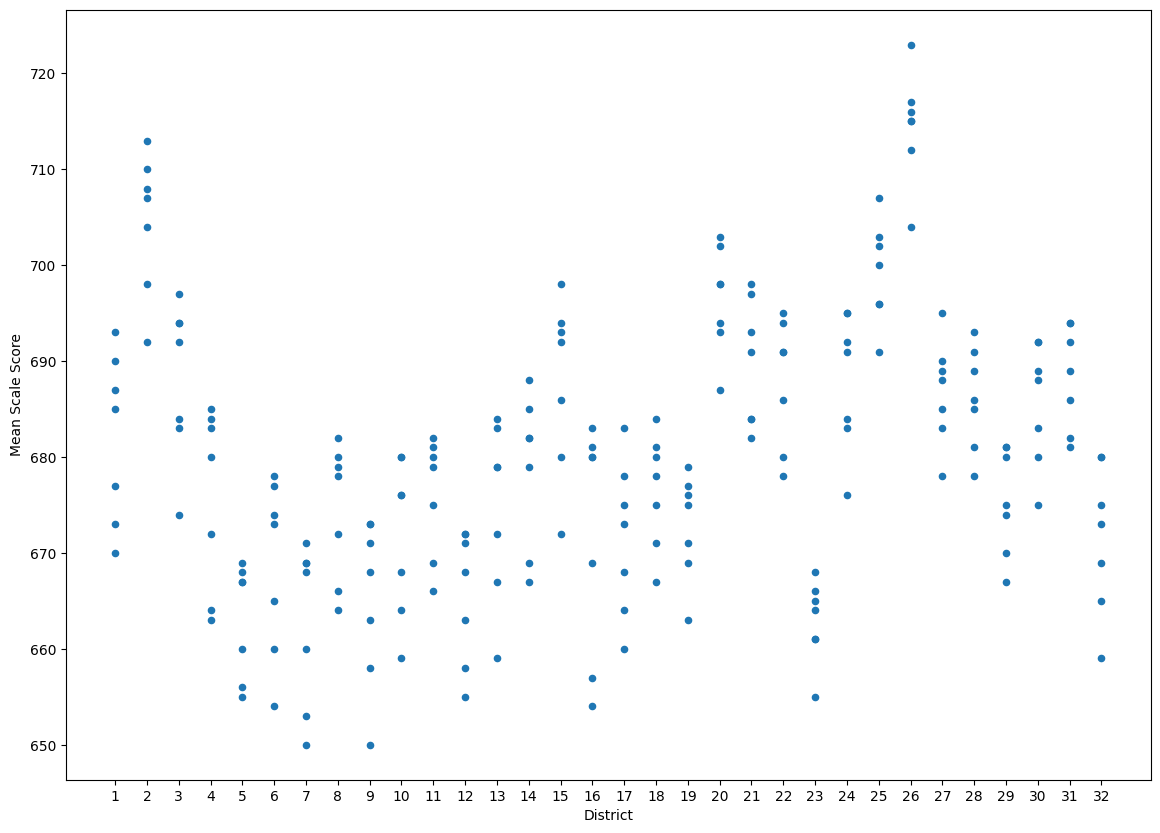

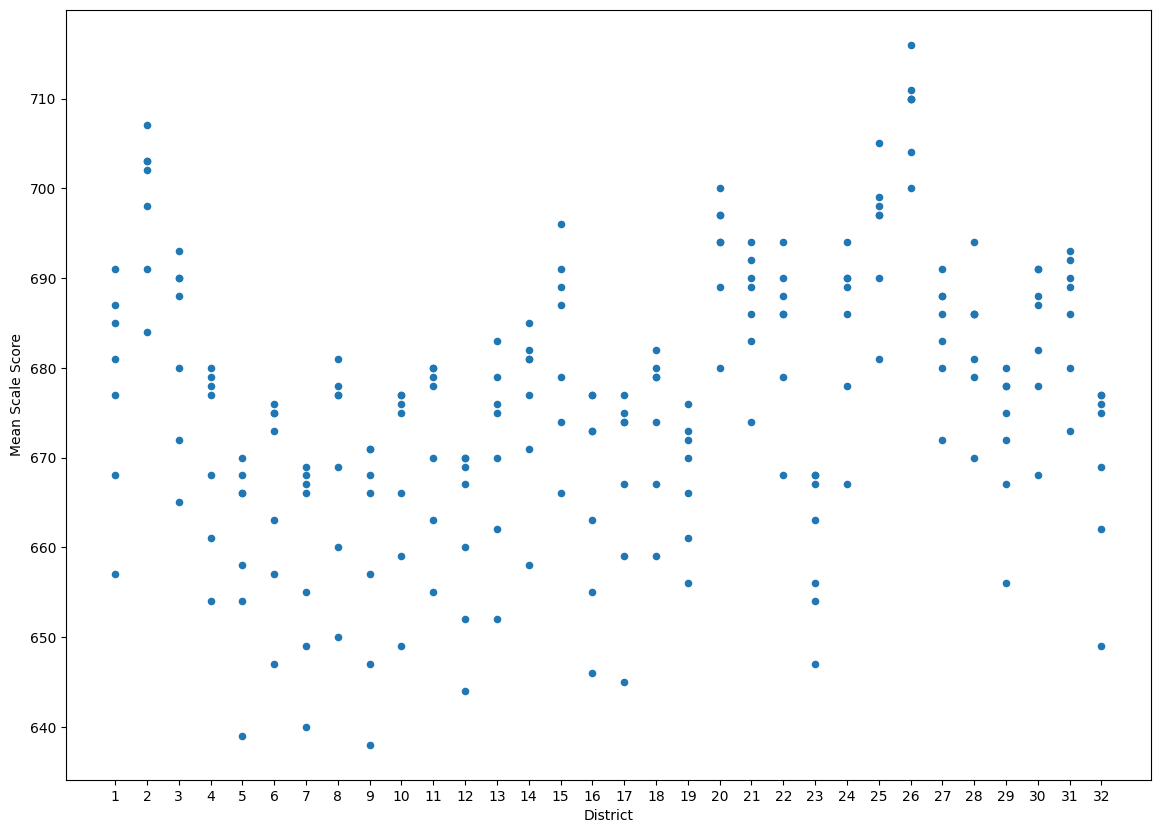

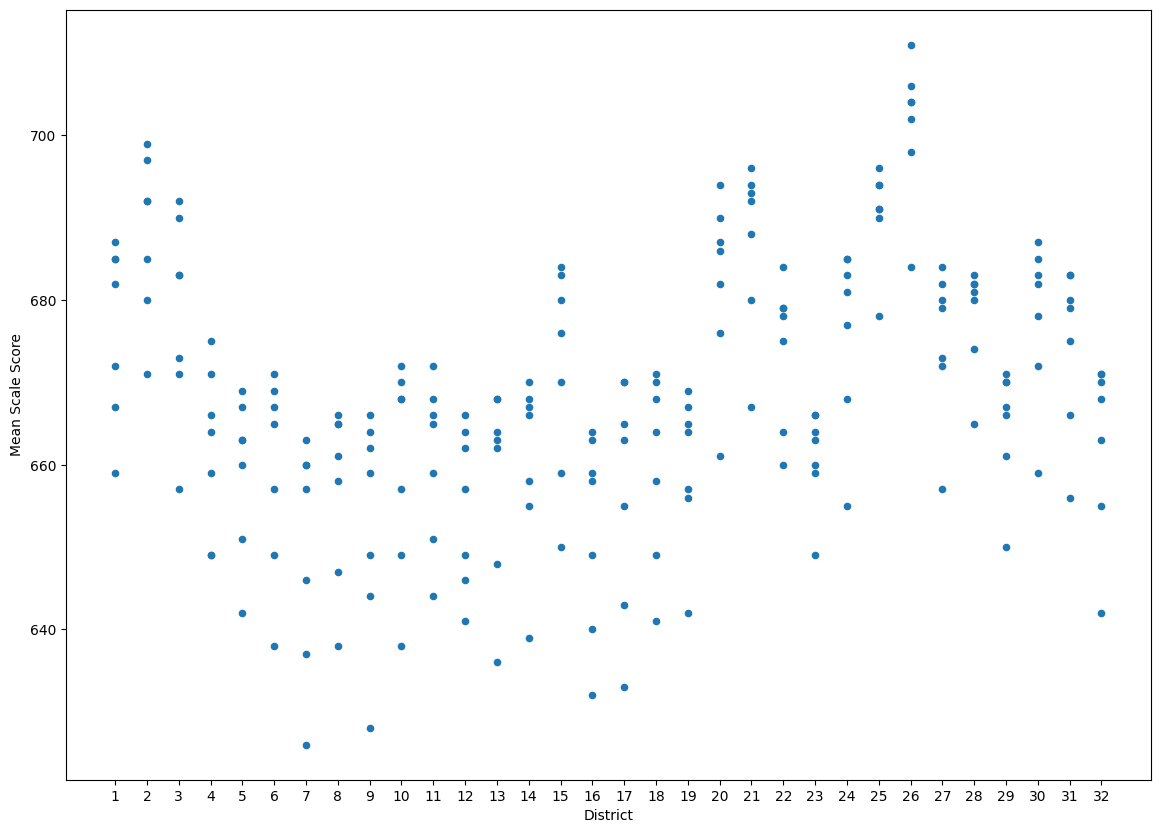

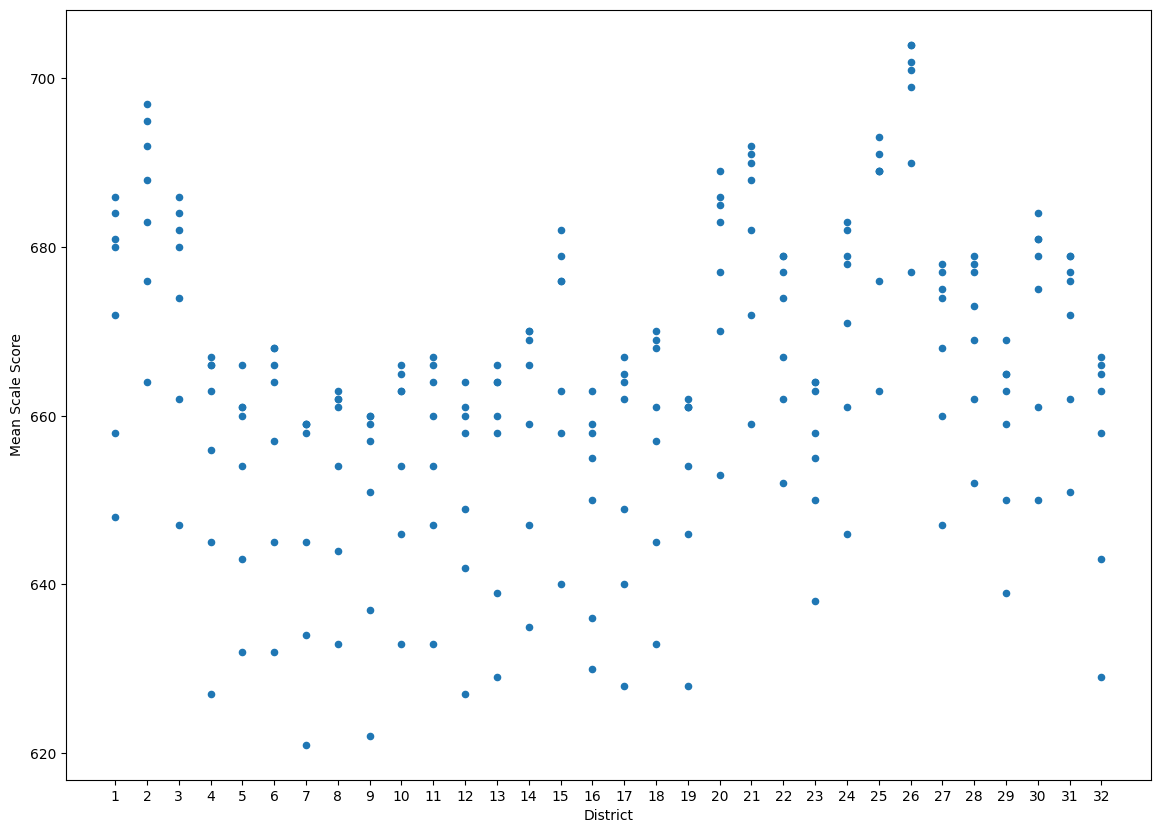

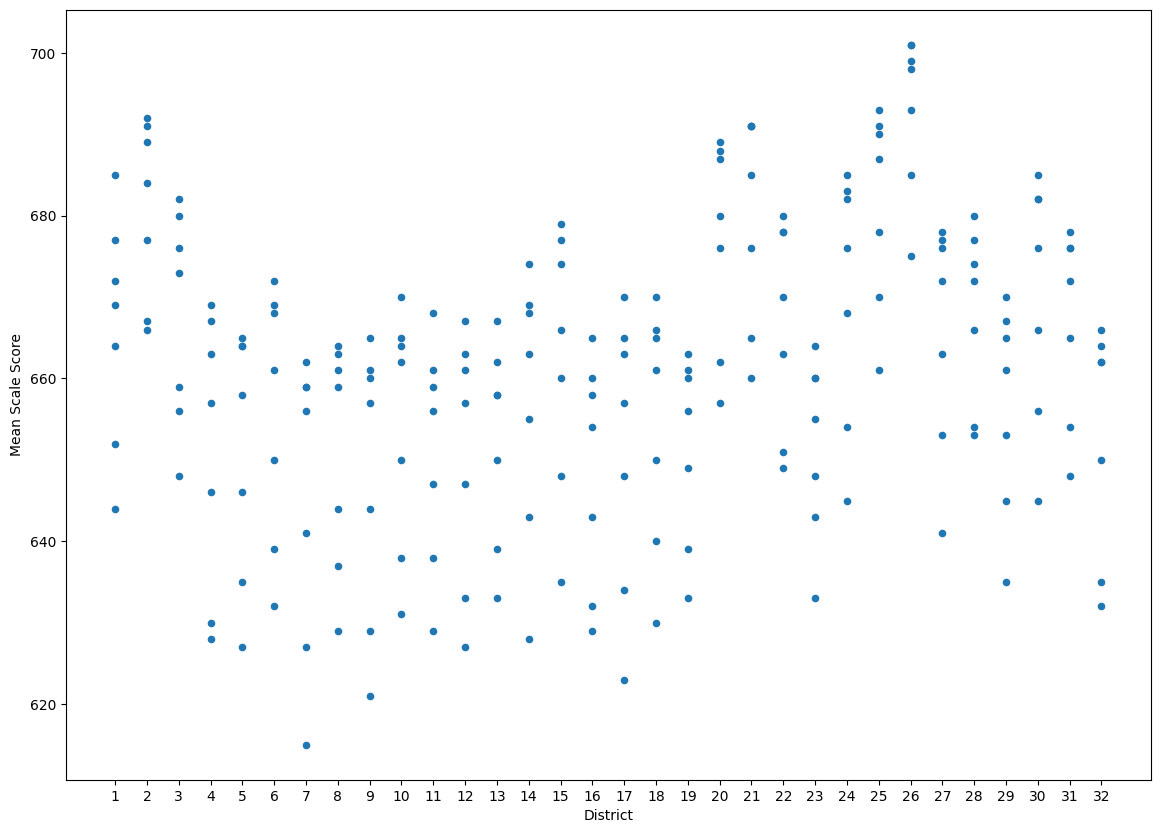

In [72]:
schools.groupby(['Grade']).plot(x='District', y='Mean Scale Score', kind="scatter", figsize=(14, 10), xticks=np.arange(1,33))

## Analyzing the Data

### <span style="color:red">Task</span>

Define a function *top* that returns the *n* rows with the highest value for the specified *column*.

*top* should accept a dataframe as its first input, a parameter named *n* that accepts a number and provides a reasonable default, and a parameter called *column* that defaults to 'Mean Scale Score'.

Demonstrate the function against the entire 'schools' dataframe.

(Hint: See panda_dataframe_part5 from lectures)

In [73]:
def top(df, n=5, column='Mean Scale Score'):
    return df.sort_values(by=column, ascending=False)[:n]

top(schools)

,District,Grade,Year,Demographic,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
1235,26,4,2009,All Students,1621,723,8,0.5,33,2.0,413,25.5,1167,72.0,1580,97.5
1228,26,3,2009,All Students,1704,718,1,0.1,11,0.6,759,44.5,933,54.8,1692,99.3
1229,26,3,2010,All Students,1597,717,24,1.5,197,12.3,555,34.8,821,51.4,1376,86.2
1238,26,4,2012,All Students,1682,717,17,1.0,110,6.5,452,26.9,1103,65.6,1555,92.4
1245,26,5,2012,All Students,1713,716,30,1.8,115,6.7,489,28.5,1079,63.0,1568,91.5


### <span style="color:red">Task</span>

Use the *apply* method and your defined *top* function to display the full row for the top score in each grade.

(Hint: use groupby and then apply)

In [74]:
schools.groupby(['Grade']).apply(top, n=1)

,,District,Grade,Year,Demographic,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
Grade,,,,,,,,,,,,,,,,,
3,1228,26,3,2009,All Students,1704,718,1,0.1,11,0.6,759,44.5,933,54.8,1692,99.3
4,1235,26,4,2009,All Students,1621,723,8,0.5,33,2.0,413,25.5,1167,72.0,1580,97.5
5,1245,26,5,2012,All Students,1713,716,30,1.8,115,6.7,489,28.5,1079,63.0,1568,91.5
6,1252,26,6,2012,All Students,1954,711,36,1.8,152,7.8,508,26.0,1258,64.4,1766,90.4
7,1259,26,7,2012,All Students,1863,704,39,2.1,176,9.4,472,25.3,1176,63.1,1648,88.5
8,1266,26,8,2012,All Students,1952,701,35,1.8,268,13.7,712,36.5,937,48.0,1649,84.5


### <span style="color:red">Task</span>

What insight did you get from the previous cell?

The top scores are all in district 26. Also, the score trends down as the grade level increases.

### <span style="color:red">Task</span>

Extend your selection above to show the row for the top score for each combination of grade and year.
(Hint: extend your groupby)

In [75]:
schools.groupby(['Grade','Year']).apply(top, n=1)

District Grade  Year   Demographic  Number Tested  \
Grade Year                                                           
3     2006 1225        26     3  2006  All Students           1621   
      2007 1226        26     3  2007  All Students           1636   
      2008 1227        26     3  2008  All Students           1615   
      2009 1228        26     3  2009  All Students           1704   
      2010 1229        26     3  2010  All Students           1597   
      2011 1230        26     3  2011  All Students           1604   
      2012 1231        26     3  2012  All Students           1672   
4     2006 1232        26     4  2006  All Students           1721   
      2007 1233        26     4  2007  All Students           1657   
      2008 1234        26     4  2008  All Students           1637   
      2009 1235        26     4  2009  All Students           1621   
      2010 1236        26     4  2010  All Students           1784   
      2011 1237        26     4  2011  All Students           1653   
      2012 1238        26     4  2012  All Students           1682   
5     2006 1239        26     5  2006  All Students           1772   
      2007 1240        26     5  2007  All Students           1744   
      2008 1241        26     5  2008  All Students           1709   
      2009 1242        26     5  2009  All Students           1696   
      2010 1243        26     5  2010  All Students           1685   
      2011 1244        26     5  2011  All Students           1831   
      2012 1245        26     5  2012  All Students           1713   
6     2006 1246        26     6  2006  All Students           1959   
      2007 1247        26     6  2007  All Students           1932   
      2008 1248        26     6  2008  All Students           1875   
      2009 1249        26     6  2009  All Students           1872   
      2010 1250        26     6  2010  All Students           1882   
      2011 1251        26     6  2011  All Students           1823   
      2012 1252        26     6  2012  All Students           1954   
7     2006 1253        26     7  2006  All Students           1953   
      2007 1254        26     7  2007  All Students           1886   
      2008 1255        26     7  2008  All Students           1918   
      2009 1256        26     7  2009  All Students           1960   
      2010 1257        26     7  2010  All Students           1933   
      2011 1258        26     7  2011  All Students           1910   
      2012 1259        26     7  2012  All Students           1863   
8     2006 1260        26     8  2006  All Students           2124   
      2007 1261        26     8  2007  All Students           1957   
      2008 1262        26     8  2008  All Students           1988   
      2009 1263        26     8  2009  All Students           2009   
      2010 1264        26     8  2010  All Students           2037   
      2011 1265        26     8  2011  All Students           1966   
      2012 1266        26     8  2012  All Students           1952   

                 Mean Scale Score  Num Level 1  Pct Level 1  Num Level 2  \
Grade Year                                                                 
3     2006 1225               708           12          0.7           40   
      2007 1226               712           13          0.8           41   
      2008 1227               713            8          0.5           25   
      2009 1228               718            1          0.1           11   
      2010 1229               717           24          1.5          197   
      2011 1230               701           24          1.5          167   
      2012 1231               703           18          1.1          185   
4     2006 1232               704           40          2.3           72   
      2007 1233               712           15          0.9           50   
      2008 1234               715           13          0.8           35   
      2009 1235         

### <span style="color:red">Task</span>

What insight did you get from the previous cell?

For most grades, the top score trended upward from 2006 to 2012.

### <span style="color:red">Task</span>

Is there a trend on scores in the best district?  

Using the DataFrame *plot* method, plot the performance by grade of the top distict across time.

(Hint: Use selection, then groupby, then plot.  Do not use a scatter plot for this task.  You want a basic plot that shows the trend over time/years. )

Over time, is the district peformance improving, deteriorating, or staying the same for each grade?

<Axes: title={'center': 'Grade 8 Top Performance by Year'}, xlabel='Year'>

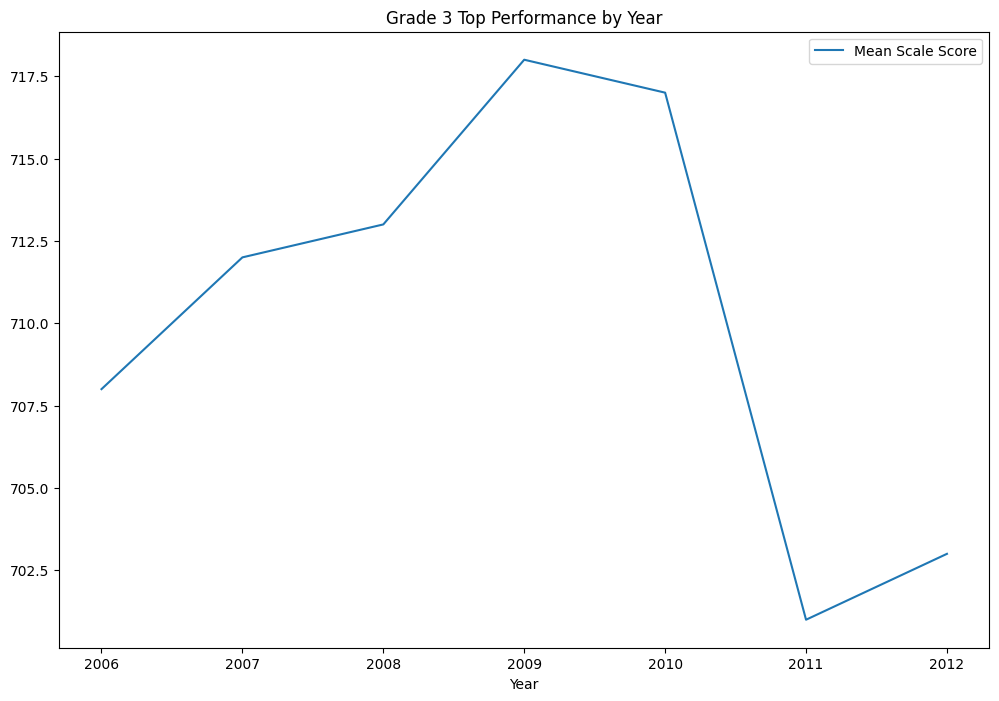

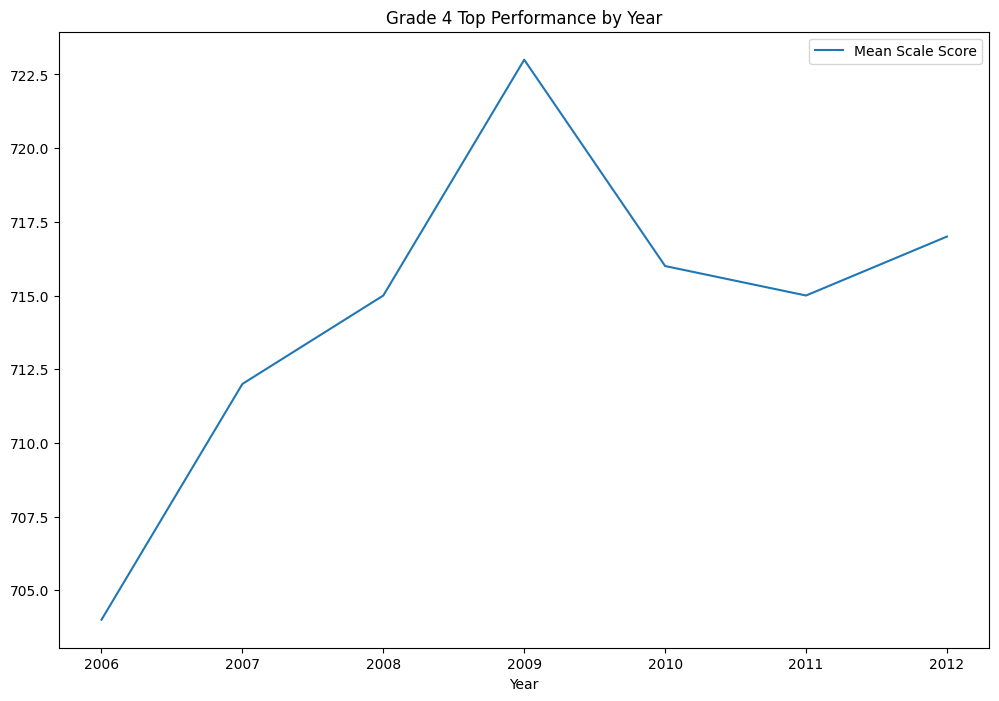

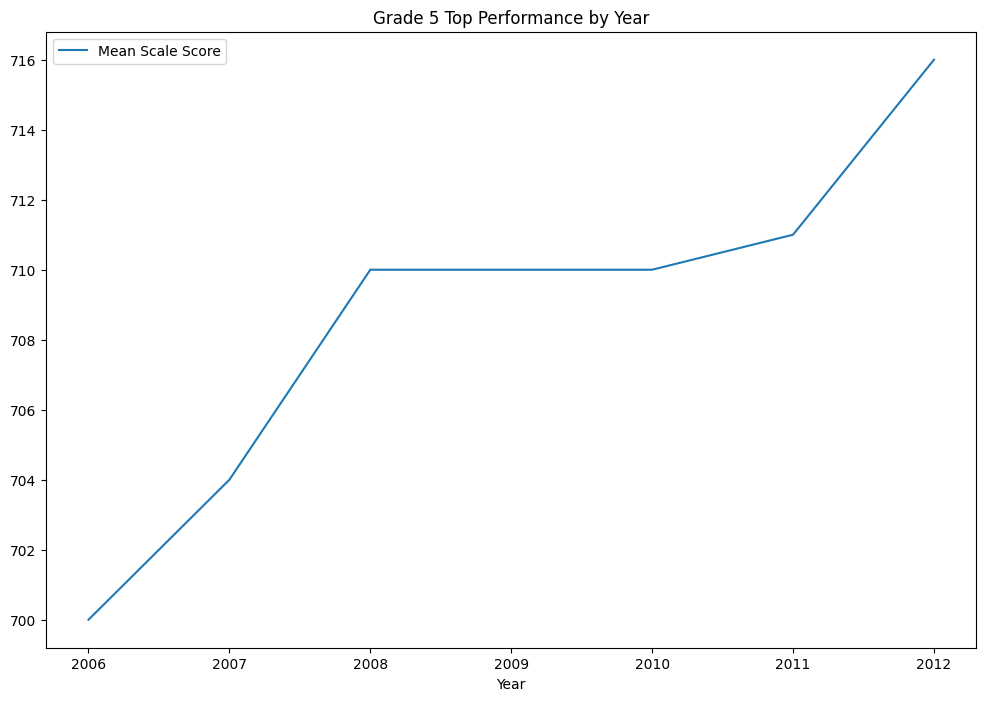

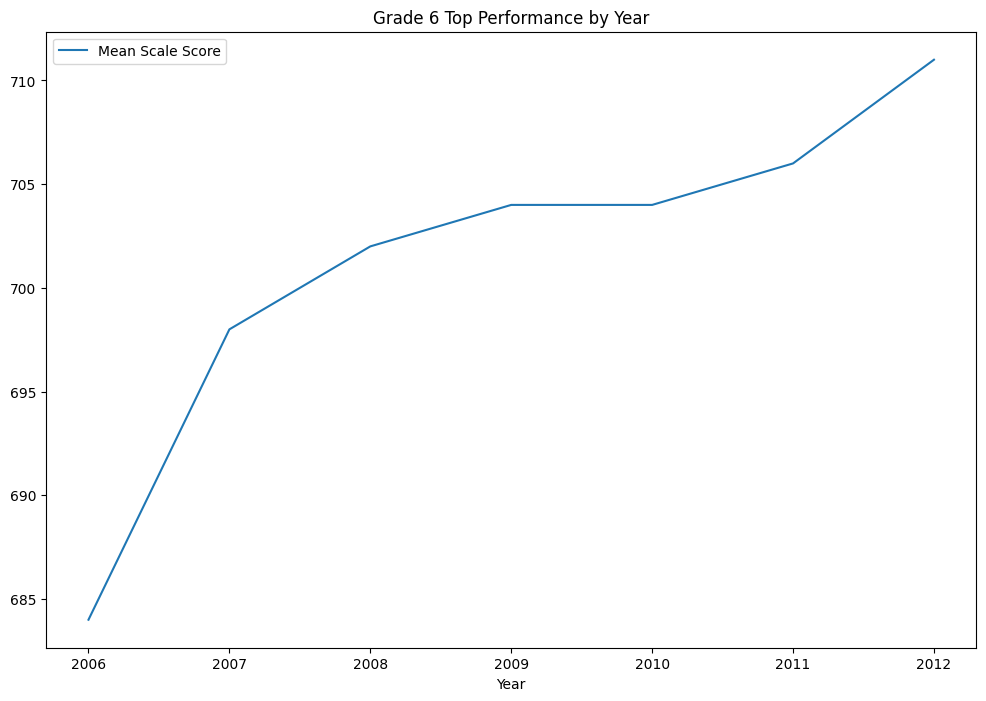

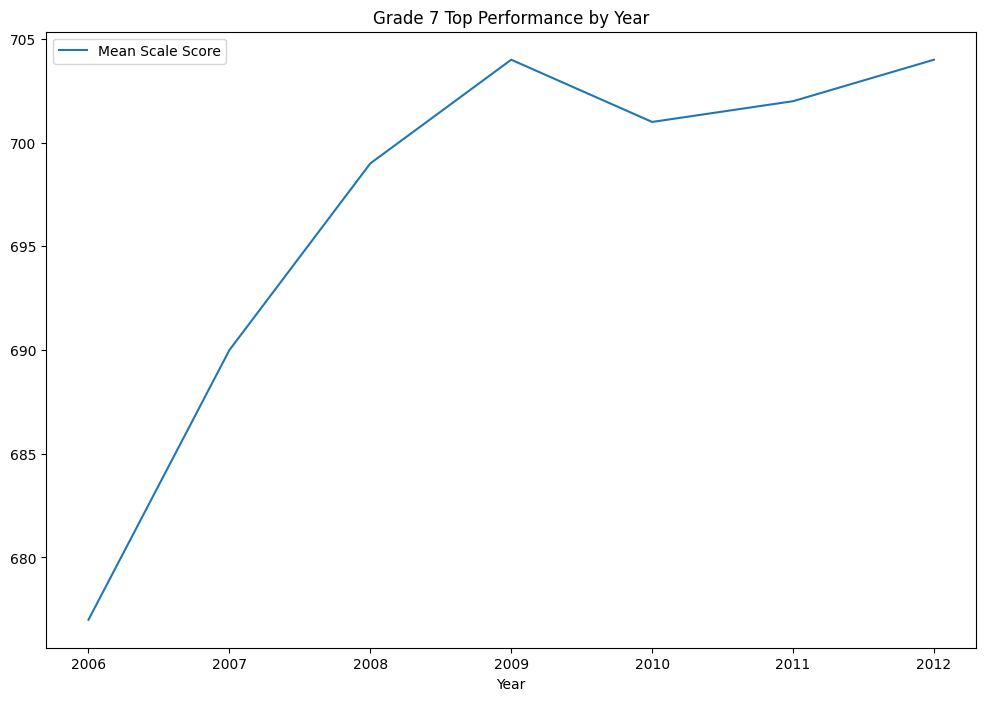

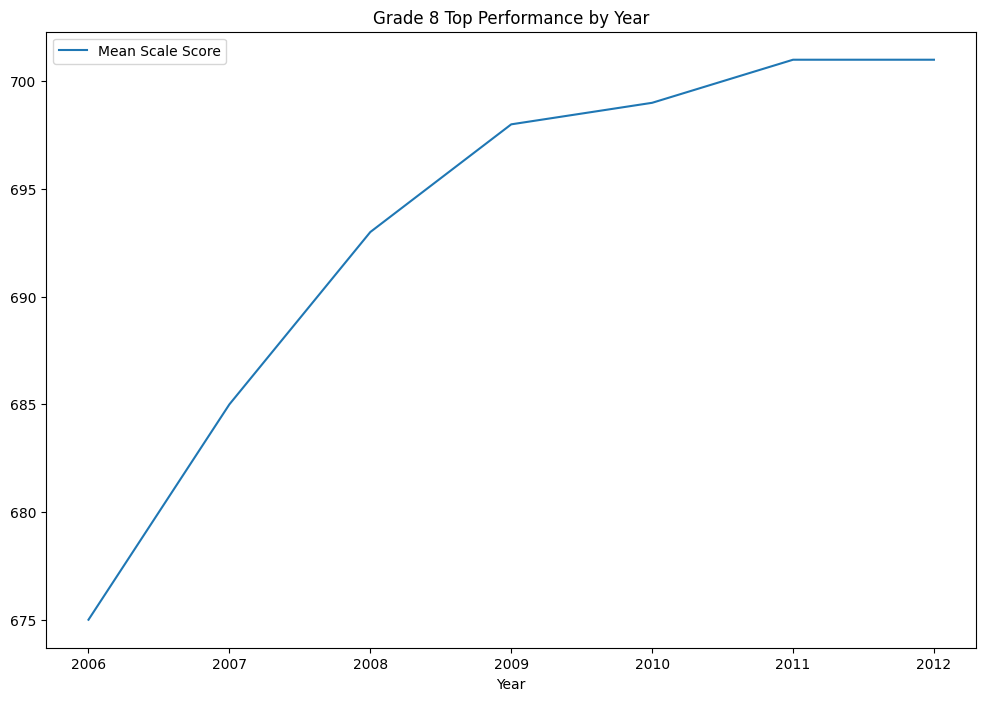

In [76]:
schools[schools['Grade']=='3'].groupby(['Year']).apply(top, n=1).plot(x='Year', y='Mean Scale Score', title='Grade 3 Top Performance by Year')
schools[schools['Grade']=='4'].groupby(['Year']).apply(top, n=1).plot(x='Year', y='Mean Scale Score', title='Grade 4 Top Performance by Year')
schools[schools['Grade']=='5'].groupby(['Year']).apply(top, n=1).plot(x='Year', y='Mean Scale Score', title='Grade 5 Top Performance by Year')
schools[schools['Grade']=='6'].groupby(['Year']).apply(top, n=1).plot(x='Year', y='Mean Scale Score', title='Grade 6 Top Performance by Year')
schools[schools['Grade']=='7'].groupby(['Year']).apply(top, n=1).plot(x='Year', y='Mean Scale Score', title='Grade 7 Top Performance by Year')
schools[schools['Grade']=='8'].groupby(['Year']).apply(top, n=1).plot(x='Year', y='Mean Scale Score', title='Grade 8 Top Performance by Year')

### <span style="color:red">Bonus Task</span>

Repeat the plots above, but print a title that includes the grade number on each plot of the best district's performance.

### <span style="color:red">Task</span>

Define a function *bottom* that returns the *n* rows with the lowest value for the specified *column*.

*bottom* should accept a dataframe as its first input, a parameter named *n* that accepts a number and provides a reasonable default, and a paramater called *column* that defaults to 'Mean Scale Score'.

(Hint: This is similar to top)

Demonstrate the function against the entire 'schools' dataframe.

In [77]:
def bottom(df, n=5, column='Mean Scale Score'):
    return df.sort_values(by=column, ascending=True)[:n]

### <span style="color:red">Task</span>

Use the *apply* method and your defined *bottom* function to display the full row for the bottom score in each grade.

In [78]:
schools.groupby(['Grade']).apply(bottom, n=1)

,,District,Grade,Year,Demographic,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
Grade,,,,,,,,,,,,,,,,,
3,295,7,3,2006,All Students,1463,655,232,15.9,351,24.0,749,51.2,131,9.0,880,60.2
4,302,7,4,2006,All Students,1394,650,245,17.6,407,29.2,623,44.7,119,8.5,742,53.2
5,407,9,5,2006,All Students,3056,638,751,24.6,1137,37.2,1050,34.4,118,3.9,1168,38.2
6,316,7,6,2006,All Students,1569,626,553,35.2,588,37.5,387,24.7,41,2.6,428,27.3
7,323,7,7,2006,All Students,1648,621,520,31.6,769,46.7,339,20.6,20,1.2,359,21.8
8,330,7,8,2006,All Students,1540,615,648,42.1,652,42.3,231,15.0,9,0.6,240,15.6


### <span style="color:red">Task</span>

What insight did you get from the previous cell?

District 7 has the lowest Mean Scale Score for all but the 5th grade, and all the lowest scores were recorded in 2006.

### <span style="color:red">Task</span>

Extend your selection above to show the row for the bottom score for the combination of grade and year.

In [79]:
schools.groupby(['Grade', 'Year']).apply(bottom, n=1)

District Grade  Year   Demographic  Number Tested  \
Grade Year                                                           
3     2006 295          7     3  2006  All Students           1463   
      2007 296          7     3  2007  All Students           1431   
      2008 1080        23     3  2008  All Students           1166   
      2009 1081        23     3  2009  All Students           1066   
      2010 1082        23     3  2010  All Students           1012   
      2011 1083        23     3  2011  All Students           1040   
      2012 1084        23     3  2012  All Students           1005   
4     2006 302          7     4  2006  All Students           1394   
      2007 303          7     4  2007  All Students           1475   
      2008 206          5     4  2008  All Students           1062   
      2009 207          5     4  2009  All Students           1058   
      2010 1089        23     4  2010  All Students           1054   
      2011 1090        23     4  2011  All Students           1003   
      2012 1091        23     4  2012  All Students            967   
5     2006 407          9     5  2006  All Students           3056   
      2007 408          9     5  2007  All Students           3127   
      2008 311          7     5  2008  All Students           1416   
      2009 312          7     5  2009  All Students           1329   
      2010 1096        23     5  2010  All Students            950   
      2011 1097        23     5  2011  All Students            986   
      2012 217          5     5  2012  All Students            923   
6     2006 316          7     6  2006  All Students           1569   
      2007 317          7     6  2007  All Students           1521   
      2008 318          7     6  2008  All Students           1422   
      2009 564         12     6  2009  All Students           1775   
      2010 761         16     6  2010  All Students            643   
      2011 321          7     6  2011  All Students           1393   
      2012 322          7     6  2012  All Students           1361   
7     2006 323          7     7  2006  All Students           1648   
      2007 324          7     7  2007  All Students           1626   
      2008 325          7     7  2008  All Students           1543   
      2009 767         16     7  2009  All Students            812   
      2010 768         16     7  2010  All Students            690   
      2011 769         16     7  2011  All Students            654   
      2012 329          7     7  2012  All Students           1385   
8     2006 330          7     8  2006  All Students           1540   
      2007 331          7     8  2007  All Students           1613   
      2008 332          7     8  2008  All Students           1518   
      2009 774         16     8  2009  All Students            823   
      2010 775         16     8  2010  All Students            817   
      2011 335          7     8  2011  All Students           1397   
      2012 336          7     8  2012  All Students           1333   

                 Mean Scale Score  Num Level 1  Pct Level 1  Num Level 2  \
Grade Year                                                                 
3     2006 295                655          232         15.9          351   
      2007 296                666          142          9.9          287   
      2008 1080               667           92          7.9          209   
      2009 1081               673           39          3.7          160   
      2010 1082               675          267         26.4          442   
      2011 1083               671          282         27.1          464   
      2012 1084               674          269         26.8          435   
4     2006 302                650          245         17.6          407   
      2007 303                653          223         15.1          461   
      2008 206                660          130         12.2          221   
      2009 207          

### <span style="color:red">Task</span>

What insight did you get from the previous cell?

Districts 16 and 23 are also have scores at the bottom. 

## Results

The Mayor wants to recognize the top performing districts and direct additional resources to assist lower performing districts.

She asks you to rank the scores by performance as follows.  

For each grade and year, rank each district based upon their 'Mean Scale Score.'  The district with the highest 'Mean Scale Score' should get a rank of 1, the second highest should get a rank of 2, etc.

After ranking for each grade and year, sum the ranks for each grade over all years.  For the Mayor's purpose, the districts with the lowest total sum of the ranks (i.e., the lowest rank numbers overall) are considered the best performing schools.

This task is going to take a bit of work, so let's break the problem into incremental chunks of work.

### <span style="color:red">Task</span>

Let's make a smaller dataframe to use while we are working out the larger problem.  

Create a dataframe called 'schools_subset' from 'schools' that includes only Grade 3 for the year 2012.  We are not going to need all the columns, so only add district, grade, year, and mean scale score to the new dataframe.

Display the schools_subset dataframe.

In [80]:
schools_subset = schools[(schools['Grade']=='3') & (schools['Year']==2012)][['District','Grade','Year','Mean Scale Score']]
schools_subset

,District,Grade,Year,Mean Scale Score
6,1,3,2012,690
55,2,3,2012,697
105,3,3,2012,693
154,4,3,2012,686
203,5,3,2012,677
252,6,3,2012,680
301,7,3,2012,676
350,8,3,2012,682
399,9,3,2012,676
448,10,3,2012,682


### <span style="color:red">Task</span>

Look up the DataFrame *rank* method.  We will use this method to set the ranks.  Since we want the highest rank to be 1, we need to set the 'ascending' parameter to the *rank* call to False.

Make a function called *add_default_rank* that takes a dataframe the first parameter and a 'column' parameter with the default 'Mean Scale Score' as the second paramter.

This function should create a new column called 'Default Rank' in the passed dataframe.  The value of the new column should be the *rank* for the passed 'column' parameter.

Demonstrate your *add_default_rank* function works by calling the function on the 'students_subset' dataframe.  Print the 'schools_subset' dataframe before and after the invocation of the function to confirm that (1) the 'Default Rank' column was added and (2) that the rank assigned to each row is correct based upon the 'Mean Scaled Score' value. 

In [81]:
def add_default_rank(df, column='Mean Scale Score'):
    df['Default Rank'] = df[column].rank(method='max', ascending=False)
    return df    

In [82]:
schools_subset

,District,Grade,Year,Mean Scale Score
6,1,3,2012,690
55,2,3,2012,697
105,3,3,2012,693
154,4,3,2012,686
203,5,3,2012,677
252,6,3,2012,680
301,7,3,2012,676
350,8,3,2012,682
399,9,3,2012,676
448,10,3,2012,682


In [83]:
add_default_rank(schools_subset)

,District,Grade,Year,Mean Scale Score,Default Rank
6,1,3,2012,690,9.0
55,2,3,2012,697,3.0
105,3,3,2012,693,6.0
154,4,3,2012,686,15.0
203,5,3,2012,677,29.0
252,6,3,2012,680,26.0
301,7,3,2012,676,31.0
350,8,3,2012,682,22.0
399,9,3,2012,676,31.0
448,10,3,2012,682,22.0


In [84]:
schools_subset.sort_values('Default Rank')

,District,Grade,Year,Mean Scale Score,Default Rank
1231,26,3,2012,703,1.0
55,2,3,2012,697,3.0
1182,25,3,2012,697,3.0
105,3,3,2012,693,6.0
937,20,3,2012,693,6.0
693,15,3,2012,693,6.0
1133,24,3,2012,690,9.0
986,21,3,2012,690,9.0
6,1,3,2012,690,9.0
1476,31,3,2012,689,12.0


### <span style="color:red">Task</span>

Now that you have the *add_default_rank* function that works on a dataframe, you can use the *apply* method to apply that method to each group from a groupby.  

Group the full 'schools' dataframe by grade and year, then apply *add_default_rank* to the groups.  Store the results of this into a new 'schools2' dataframe.

Display the resulting 'schools2' dataframe.

In [85]:
schools2 = schools.groupby(['Grade', 'Year'], group_keys=True).apply(add_default_rank)

In [86]:
schools2

District Grade  Year   Demographic  Number Tested  \
Grade Year                                                           
3     2006 0            1     3  2006  All Students            936   
           49           2     3  2006  All Students           2281   
           99           3     3  2006  All Students           1466   
           148          4     3  2006  All Students           1189   
           197          5     3  2006  All Students           1149   
...                   ...   ...   ...           ...            ...   
8     2012 1364        28     8  2012  All Students           2333   
           1413        29     8  2012  All Students           2688   
           1462        30     8  2012  All Students           3038   
           1511        31     8  2012  All Students           4280   
           1560        32     8  2012  All Students           1295   

                 Mean Scale Score  Num Level 1  Pct Level 1  Num Level 2  \
Grade Year                                                                 
3     2006 0                  673           73          7.8          170   
           49                 690           79          3.5          169   
           99                 674          113          7.7          252   
           148                667          123         10.3          244   
           197                656          181         15.8          296   
...                           ...          ...          ...          ...   
8     2012 1364               680          158          6.8          772   
           1413               670          245          9.1         1258   
           1462               685          137          4.5          800   
           1511               678          283          6.6         1493   
           1560               666          184         14.2          564   

                 Pct Level 2  Num Level 3  Pct Level 3  Num Level 4  \
Grade Year                                                            
3     2006 0            18.2          484         51.7          209   
           49            7.4         1169         51.2          864   
           99           17.2          755         51.5          346   
           148          20.5          607         51.1          215   
           197          25.8          553         48.1          119   
...                      ...          ...          ...          ...   
8     2012 1364         33.1          878         37.6          525   
           1413         46.8          906         33.7          279   
           1462         26.3         1389         45.7          712   
           1511         34.9         1772         41.4          732   
           1560         43.6          428         33.1          119   

                 Pct Level 4  Num Level 3 and 4  Pct Level 3 and 4  \
Grade Year                                                           
3     2006 0            22.3                693               74.0   
           49           37.9               2033               89.1   
           99           23.6               1101               75.1   
           148          18.1                822               69.1   
           197          10.4                672               58.5   
...                      ...                ...                ...   
8     2012 1364         22.5               1403               60.1   
           1413         10.4               1185               44.1   
           1462         23.4               2101               69.2   
           1511         17.1               2504               58.5   
           1560          9.2                547               42.2   

                 Default Rank  
Grade Year                     
3     2006 0             15.0  
           49             4.0  
           99            13.0  
           148           21.0  
           197           31.0  
...                       ...  
8     2012 1364          1

### <span style="color:red">Task</span>

The 'schools2' now has a rank for each district for each grade and each year.  

To fulfill the Mayor's ranking request, we can now produce the ordered list of districts with the top performers at the top of the list.

To do this, sum the 'Default Rank' column grouping by District and sorting the result using the *sort_values* method with "ascending" set to True.

Print the resulting ordered results.

In [87]:
schools2.groupby(['District'])['Default Rank'].sum().sort_values(ascending=True)

District
26      42.0
2      110.0
25     119.0
20     193.0
21     231.0
24     382.0
3      397.0
30     408.0
31     416.0
22     429.0
28     448.0
15     478.0
27     481.0
1      489.0
14     729.0
29     786.0
18     817.0
4      880.0
11     889.0
13     926.0
32     935.0
10     959.0
6      994.0
8      997.0
19    1020.0
17    1038.0
23    1136.0
16    1152.0
5     1161.0
12    1198.0
9     1239.0
7     1315.0
Name: Default Rank, dtype: float64